In [20]:
import pandas as pd
data=pd.read_csv("Mall_Customers.csv")

data["Gender"]=data["Gender"].map({"Male":1, "Female":0})  
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [21]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
from sklearn.cluster import AgglomerativeClustering 

model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  

In [23]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
195,3
196,3
197,3
198,3


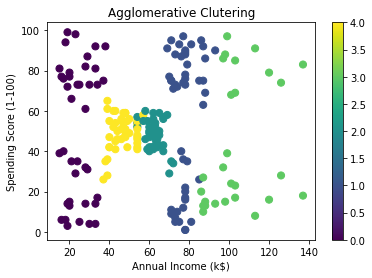

In [24]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['Annual Income (k$)'] , data ["Spending Score (1-100)"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)

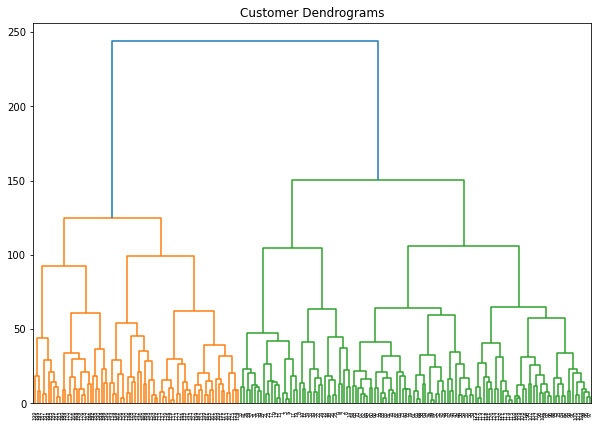

In [25]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [26]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [27]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,1
2,3
3,1
4,3
...,...
195,2
196,4
197,2
198,4


In [28]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   

[[ 94.03174603   0.42857143  42.15873016  58.3015873   49.3015873 ]
 [ 23.04166667   0.41666667  25.25        25.83333333  76.91666667]
 [162.           0.46153846  32.69230769  86.53846154  82.12820513]
 [ 36.86842105   0.36842105  46.42105263  33.65789474  32.65789474]
 [164.           0.52777778  40.80555556  87.91666667  17.88888889]]


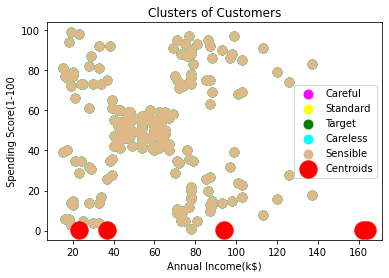

In [29]:
plt.scatter(data["Annual Income (k$)"],          
            data["Spending Score (1-100)"],s=80,c='magenta',label='Careful')
plt.scatter(data["Annual Income (k$)"],
           data["Spending Score (1-100)"],s=80,c='yellow',label='Standard')
plt.scatter(data["Annual Income (k$)"],
           data["Spending Score (1-100)"],s=80,c='green',label='Target')
plt.scatter(data["Annual Income (k$)"], 
           data["Spending Score (1-100)"],s=80,c='cyan',label='Careless')
plt.scatter(data["Annual Income (k$)"], 
           data["Spending Score (1-100)"],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()


In [34]:
Sum=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(data)
    Sum.append(kmeans.inertia_)
Sum


[975512.06,
 387065.7137713772,
 271396.5629660314,
 195401.19855991477,
 157170.8000699301,
 122628.0624055683,
 103233.09788480632,
 86053.67444777439,
 77010.1590581194,
 69161.2435584883,
 64377.43454236742,
 60736.816555855796,
 55534.432480823234,
 51661.68455294706]